In [82]:
import pandas as pd

In [83]:
train=pd.read_csv('train.csv')

In [84]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [85]:
import seaborn as sns
import matplotlib as plt

<Axes: >

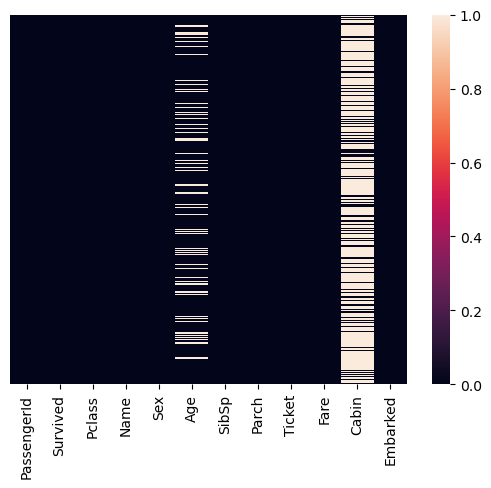

In [86]:
sns.heatmap(train.isnull(),yticklabels=False)

In [87]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [88]:
Sex=pd.get_dummies(train['Sex'],drop_first=True).astype(int)
Embarked=pd.get_dummies(train['Embarked'],drop_first=True).astype(int)

In [89]:
train.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [90]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,0,3,22.0,1,0,7.2500,NaN
1,1,1,38.0,1,0,71.2833,C85
2,1,3,26.0,0,0,7.9250,NaN
3,1,1,35.0,1,0,53.1000,C123
4,0,3,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN
887,1,1,19.0,0,0,30.0000,B42
888,0,3,NaN,1,2,23.4500,NaN
889,1,1,26.0,0,0,30.0000,C148


In [91]:
train=pd.concat([train,Sex,Embarked],axis=1)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,1,1,38.0,1,0,71.2833,C85,0,0,0
2,1,3,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,35.0,1,0,53.1000,C123,0,0,1
4,0,3,35.0,0,0,8.0500,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,1,0,1
887,1,1,19.0,0,0,30.0000,B42,0,0,1
888,0,3,NaN,1,2,23.4500,NaN,0,0,1
889,1,1,26.0,0,0,30.0000,C148,1,0,0


In [92]:
train.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
male          0
Q             0
S             0
dtype: int64

In [93]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age)==True:
        if Pclass==1:
            return 40
        elif Pclass==2:
            return 25
        else:
            return 18
    else:
        return Age

In [95]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

/var/folders/3l/xwqlp2yd56l3m5xnrjxxflj80000gn/T/ipykernel_2923/3439202673.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
/var/folders/3l/xwqlp2yd56l3m5xnrjxxflj80000gn/T/ipykernel_2923/3439202673.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


In [103]:
train.drop(['Cabin'],axis=1,inplace=True)

In [104]:
train.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

In [105]:
X=train.drop(['Survived'],axis=1)
y=train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
log_model=LogisticRegression()

In [114]:
log_model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
predictions=log_model.predict(x_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0])

In [116]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy=accuracy_score(y_test,predictions)

In [119]:
accuracy

0.7761194029850746